# Term Project 중간 레포트

제안자 : 2016104113 김예미

## 1. 주제 선정 이유

"한국 영화산업의 매출과 관객 수가 역대 최고치를 기록하며 성장을 거듭하는 반면, 소수의 영화기업이 영화의 제작투자·배급·상영 등을 독점하여 영화산업 전반에 불공정한 거래관행을 고착시키고 있음. 특히 시장지배적 사업자의 지위에 있는 영화상영업자가 특정 영화를 과도하게 상영하여 다양한 영화를 관람하고 싶어 하는 관객들의 영화선택권을 침해하고 있는 상황임. 이에 대기업의 영화상영업과 영화배급업 겸영에 일정한 규제를 가하여 영화상영관 독과점으로 인한 폐해를 방지하고, 제작 예산 규모가 상대적으로 작은 예술영화 및 독립영화에 대한 지원을 강화함으로써 한국영화의 다양성을 증진하고 영화관객의 문화향유권을 보장하려는 것임."<br>
<br>
현재 국회에 계류되어 있는 <영화 및 비디오물의 진흥에 관한 법률(이하 영비법)>의 개정안은 ``"영화배급업자 또는 영화상영업자가 대기업에 해당하는 경우에는 영화배급업 또는 영화상영업을 겸업할 수 없도록 함"``의 내용을 담고 있다. 이는 대기업이 영화 배급과 상영을 겸업할 경우, 대기업에 속한 멀티플렉스 극장이 '자사 영화 밀어주기'로 스크린을 독점적으로 배정할 수 있음을 우려한 대안이다. 하지만 대기업 투자 배급사의 주장은 다르다. 수직계열화(제작·투자·배급·상영 등을 독점)가 스크린 쏠림 현상과 직결되지 않는다는 이야기다. 주장에 따르면 극장은 자사 영화라도 좌석 점유율이 낮다면 많은 스크린을 내주지 않는다. <br>
이에, 과연 ``대기업 수직계열화``가 ``스크린 쏠림 현상``에 영향을 주는가에 대해 데이터 분석을 진행하기로 했다.
<br><br>
대기업의 수직계열화 예시)
- CJ : 제작사 JK필름 / 투자배급사 CJ E&M / 멀티플렉스 CGV
- 롯데 : 투자배급사 롯데엔터테인먼트 / 멀티플렉스 롯데시네마
<br><br><br>
참고 : 영화 및 비디오물의 진흥에 관한 법률 일부개정법률안(도종환의원 대표 발의, 의안번호 3081)<br>
http://likms.assembly.go.kr/bill/billDetail.do?billId=PRC_M1H6Y1Y0E3E1C1H4X0P3A3D8R7N9W4&ageFrom=20&ageTo=20

## 2. 가설 정의

### 대기업의 배급과 상영 겸업, 스크린 독과점에 영향을 줄 것이다.<br>

기업의 목적은 이윤추구이다. 대기업이 영화의 배급과 상영을 겸업할 경우, 더 큰 이익 창출을 목적으로 자사영화에 스크린을 더 배정할 가능성이 있다. ``배급과 상영을 겸업하는 대기업이 제작한 영화의 스크린 점유율``을 분석하고, 이를 ``평균 스크린 점유율``과 비교하여 대기업의 수직계열화가 스크린 쏠림 현상에 영향을 주는지에 대한 분석 결과를 도출할 것이다. 만일 이러한 가설이 사실일 경우, 영화계에서 문제가 되고 있는 스크린 독과점 현상에 대한 개정안이 사실에 입각한 타당한 제안임을 증명할 수 있다. 

## 3. 데이터 획득

- 공공데이터포털, 영화진흥위원회 제공 OPEN API<br>
1) 일일 박스오피스 : 날짜별 영화명, 영화코드, 스크린 수, 누적관객수<br>
https://www.data.go.kr/search/index.do?index=OPENAPI&query=%EC%98%81%ED%99%94%EC%A7%84%ED%9D%A5%EC%9C%84%EC%9B%90%ED%9A%8C&currentPage=1&countPerPage=10
http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml

- 영화진흥위원회 웹페이지 크롤링<br>
2) 영화 검색 화면 : 해당 영화의 배급사 이름<br>
http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieDtl.do
http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieList.do 
<br>-> 영화명 검색 - 영화제목 클릭시 뜨는 팝업창 - 영화사 - 배급사

## 4. 분석을 위한 데이터의 가공

#### 1) 영화진흥위원회 오픈 API
REST 방식. 일별 박스오피스 자료를 호출하였습니다. (응답방식 : XML)<br>
- 발급받은 키, 조회일자(yyyymmdd형식)를 파라미터로 rest요청
- beautiful soup 모듈을 이용하여 데이터 가져옴
- 영화명, 영화코드, 해당일자 스크린 수, 누적 관객 수 정보 추출
- 1. 영화명, 영화코드를 각각 movienm, moviecd 리스트에 저장
- 2. 해당일자 스크린 수를 이용하여 영화별 최대 스크린 수, 최대 스크린 수 당시의 스크린 점유율, 최고 스크린 점유율, 누적 스크린 수 정보로 재구성 후 각각 b_screennum, b_screensh, b_sh, t_screennum 리스트에 저장
- 3. 누적 관객수는 꾸준히 갱신하여 t_audiencenum 리스트에 저장

<br>
#### 2) 영화진흥위원회 웹페이지 크롤링

POST 방식. 1에서 추출한 영화코드를 파라미터로, 배급사 정보를 가진 url에 접근하였습니다.<br>
- 영화 정보를 불러올 url에 영화코드와 타입을 파라미터로 접근
- beauriful soup 모듈을 이용하여 데이터 가져옴
- 1. div태그_class='moreArea'로 거시적 검색 구역 지정
- 2. li태그_class='companyDtl1'의 내용이 '배급사'인 경우, <br>li태그_class='companyDtl2'의 내용으로 배급사 이름 추출<br>(배급사 정보가 없는 경우 예외처리)
- 배급사 정보를 companynm 리스트에 저장

<br>
#### 3) 각각의 리스트에 저장된 정보를 csv파일로 저장

- 영화코드, 영화명, 제작사명, 최고 스크린수, 해당 점유율, 최고 스크린 점유율, 누적 스크린 수, 누적 관객 수 리스트를 column로 가지는 csv 생성
- 파일로 저장

## 5. 분석 결과 도출

: 수학적 방법 혹은 논리적 방법을 Python으로 구현함으로서, 프로그램을 통해서 결과를 도출함<br>
<br>
현재 진행 중에 있습니다. 분석 결과 도출 내용은 최종 레포트에 추가기재하겠습니다.

## 6. 결론

: 본인의 명제/논리가 증명/확인 되었는지와 이를 구체적으로 서술함<br><br>
현재 진행 중에 있습니다. 결론은 5의 내용을 참고하여 최종 레포트에 추가기재하겠습니다.

## 7. 참고문헌

- [웹크롤링-크롤링(crawling) 이해 및 기본], 잔재미코딩<br>
http://fun-coding.org/crawl_basic2.html<br><br>

- [Python requests 모듈 간단 정리], 개발새발로그<br>
https://dgkim5360.tistory.com/entry/python-requests<br><br>

- [파이썬으로 크롤링 하기], hans mj<br>
https://link.medium.com/7wnRMQGaaS<br><br>

- [파이썬으로 데이터 주무르기], 민형기 지음, 비제이퍼블릭, 2017년 12월 29일 출간<br>
http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791186697474&orderClick=LEA&Kc=

## 8. 별첨 (3의 획득한 데이터 원본)

#### 1) 영화진흥위원회 오픈 API
``movie.txt`` (첨부) - 응답받은 XML data를 text파일로 저장한 것<br>
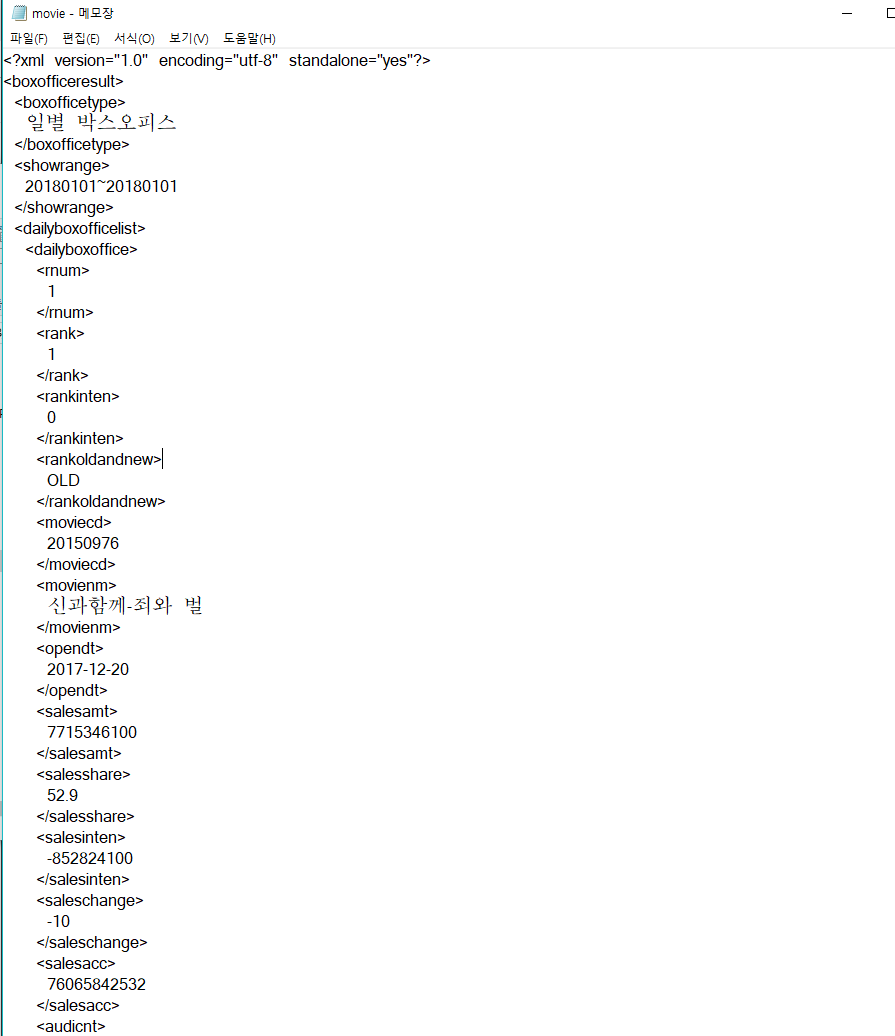
<br><br><br>
#### 2) 영화진흥위원회 웹페이지 크롤링
``movie2.txt`` (첨부) - 예시. 영화 '성난황소'의 영화코드 '20184481'을 통해 받은 data를 text파일로 저장한 것<br>
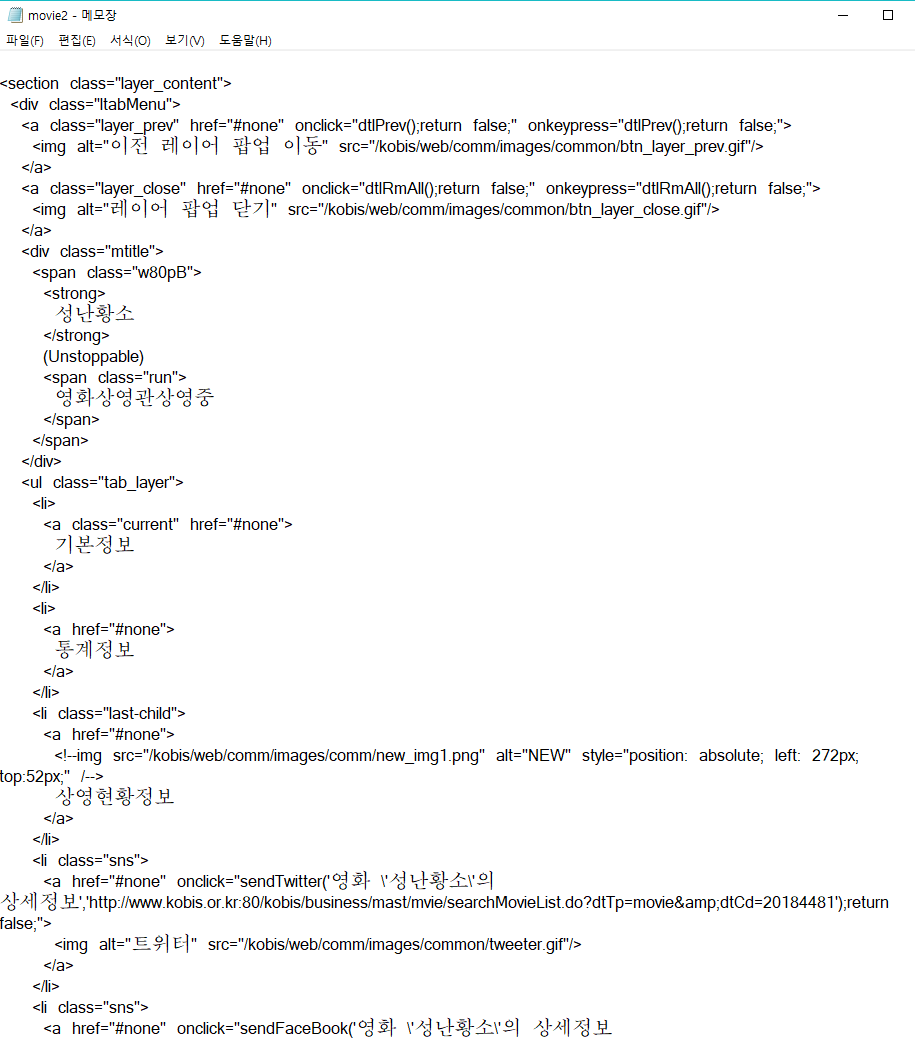

## 9. 별첨 (4의 가공된 데이터 원본)

``movielist.csv`` (첨부)<br>
- 순번, 영화코드, 영화명(국문), 배급사명, 최대 스크린 수, 최대 스크린 수 당시의 점유율, 최대 스크린 점유율, 누적 스크린 수, 누적 관객 수
- 2018년 1월 1일 ~ 2018년 11월 25일 상영된 영화들의 정보
<br><br>
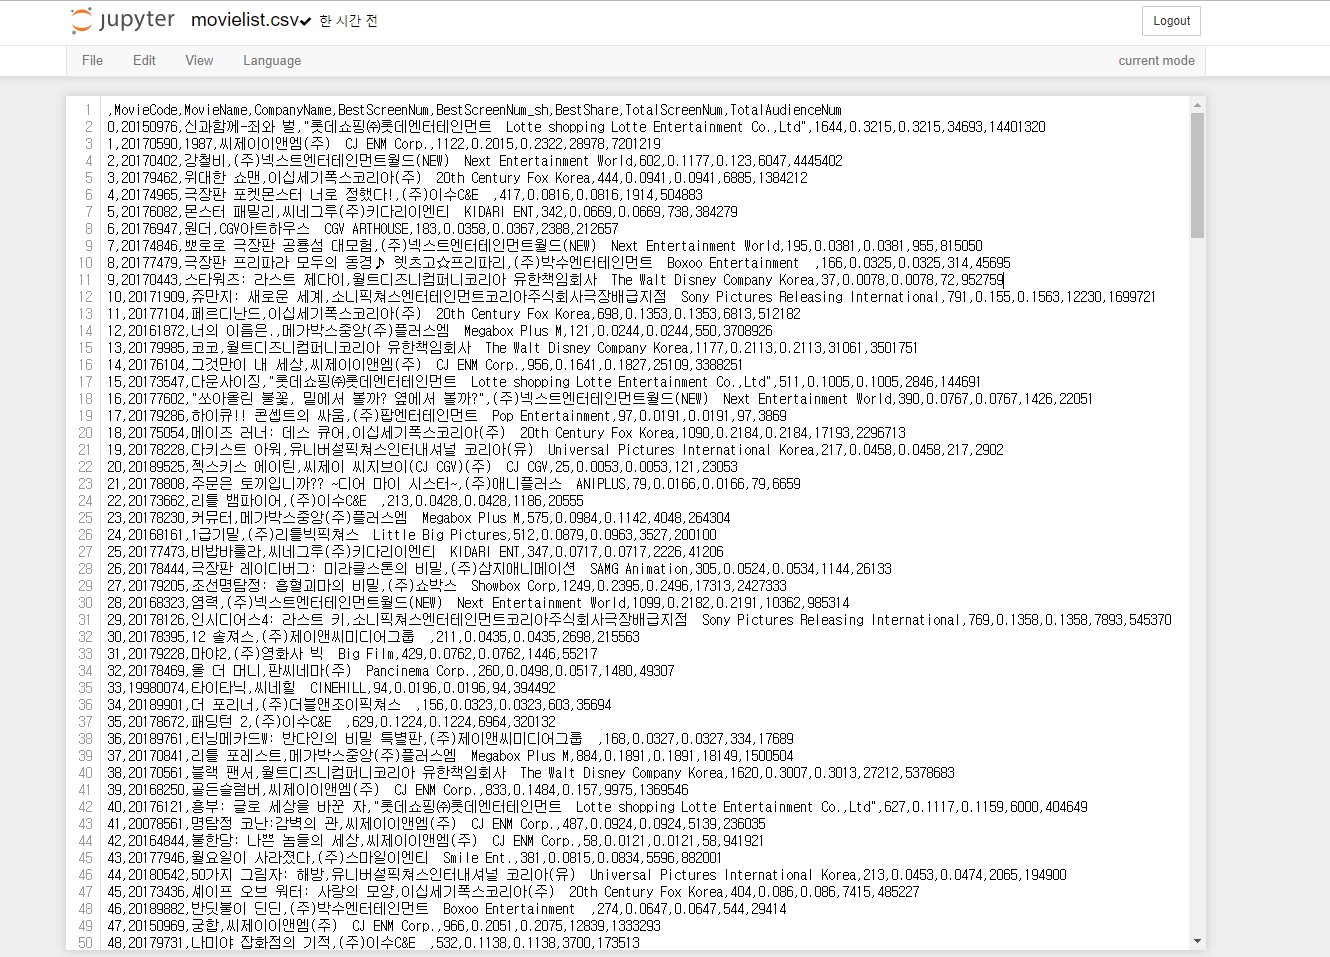
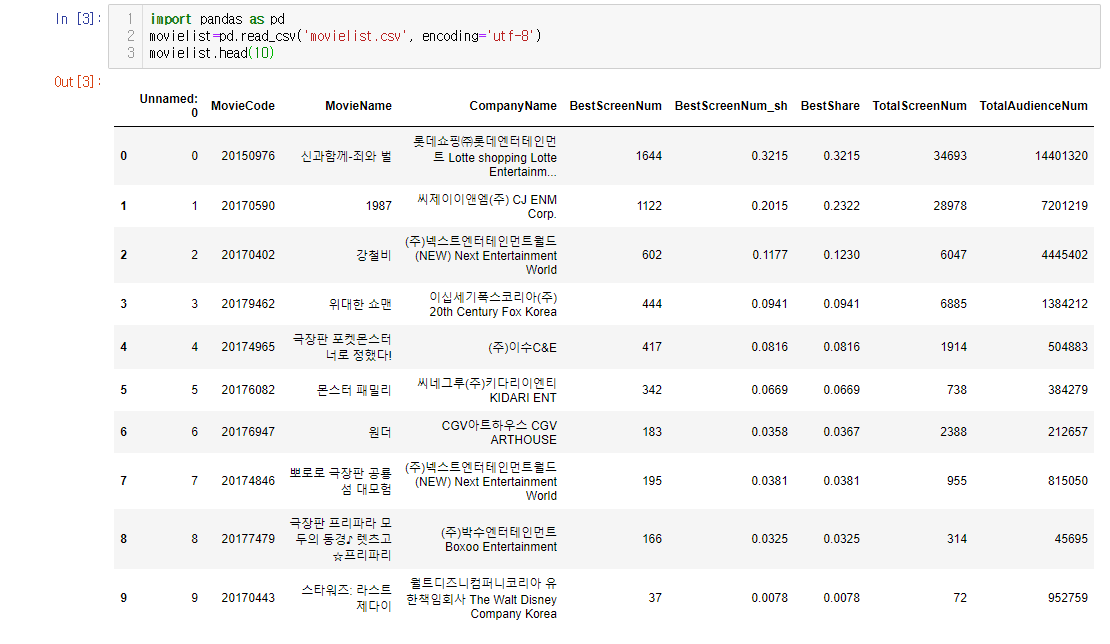

## 10. 별첨 (3을 4로 변환하는 등의 작업을 위한 python 코드)

In [ ]:
##영화 정보 불러오기
import requests
from bs4 import BeautifulSoup
import pandas as pd
df=pd.date_range('2018-01-01', '2018-11-25', freq='D')
dt=df.strftime('%Y%m%d')

#키1 : 2e3f9f878d5e3e4d501f989112f6dbc5
#키2 : 499579db3f549b47911ab6f94de402fd
_key = "2e3f9f878d5e3e4d501f989112f6dbc5"
#조회일자 yyyymmdd형식
_targetDt = ""
#영화코드
_movieCd = ""

moviecd=[]
movienm=[]
companynm=[]
b_screennum=[]
b_screensh=[]
b_sh=[]
t_screennum=[]
t_audiencenum=[]

## 2018년 영화 목록 추출 (영화명, 영화코드, 스크린 수 정보)
for i in dt:
    _targetDt = i
    params = {'key' : _key, 'targetDt':_targetDt}
    res=requests.get('http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml', params=params)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    #영화명, 영화코드, 해당일자에 상영한 스크린 수, 누적관객수, 해당일자 총 스크린 수
    title = soup.find_all('movienm')
    code = soup.find_all('moviecd')
    screen = soup.find_all('scrncnt')
    audience = soup.find_all('audiacc')
    screensum = 0
    for i in screen:
        screensum += int(i.string) 
        
    #각각의 정보를 리스트에 저장
    #영화명, 영화코드, 해당 영화 최고 스크린 수, 해당 스크린 점유율, 최고 스크린 점유율, 누적 스크린 수, 누적 관객 수
    for i in range(len(code)):
        _title = title[i].string
        _code = code[i].string
        _screen = screen[i].string
        _screensh = round(int(_screen)/screensum,4)
        _audi = audience[i].string
        
        #처음 저장하는 영화인 경우
        if _code not in moviecd:
            movienm.append(_title)
            moviecd.append(_code)
            b_screennum.append(_screen)
            b_screensh.append(_screensh)
            b_sh.append(_screensh)
            t_screennum.append(_screen)
            t_audiencenum.append(_audi)
        
        #이미 저장된 영화인 경우
        else:
            if int(_screen) > int(b_screennum[moviecd.index(_code)]):
                b_screennum[moviecd.index(_code)] = _screen
                b_screensh[moviecd.index(_code)] = _screensh
            if _screensh > b_sh[moviecd.index(_code)]:
                b_sh[moviecd.index(_code)] = _screensh
            t_screennum[moviecd.index(_code)] = int(t_screennum[moviecd.index(_code)]) + int(_screen)
            t_audiencenum[moviecd.index(_code)] = _audi
    screensum=0
    
## 제작사명 정보 불러오기 - POST 방식, KOFIC 영화진흥위원회 웹페이지 크롤링
url = "http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieDtl.do"
for cd in moviecd:
    data={'code':cd, 'sType':''}
    res=requests.post(url, data=data)
    soup = BeautifulSoup(res.content, 'html.parser')
        
    isfind=False
    #div태그 - class='moreArea' / li태그 - class='companyDtl1' : "배급사"
    #div태그 - class='moreArea' / li태그 - class='companyDtl2' : 배급사명
    companykind = soup.find("div",{"class":"moreArea"})
    if companykind is not None:
        companykind = companykind.find_all("li", {"class":"companyDtl1"})
        company = soup.find("div",{"class":"moreArea"}).find_all("li", {"class":"companyDtl2"})
      
        for i in range(len(companykind)):
            if(companykind[i].string) == "배급사":
                _company = company[i].find('a').text
                companynm.append(_company)
                isfind=True
                
    #배급사 정보가 없는 경우 예외처리
    if(not isfind):
        companynm.append('-')
    
#추출한 데이터 csv파일로 저장
data = {'MovieCode':moviecd, 'MovieName':movienm, 'CompanyName':companynm, 'BestScreenNum':b_screennum, 'BestScreenNum_sh':b_screensh, 'BestShare':b_sh, 'TotalScreenNum':t_screennum, 'TotalAudienceNum':t_audiencenum}
df = pd.DataFrame(data, columns=['MovieCode', 'MovieName', 'CompanyName', 'BestScreenNum', 'BestScreenNum_sh', 'BestShare', 'TotalScreenNum', 'TotalAudienceNum'])

df.to_csv('movielist.csv', sep=',', encoding='UTF-8')